In [6]:
%reset -f
import pandas as pd
import numpy as np
from wavhandler import *
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [7]:
X_names, y = get_data(target_names=mosquitos_6, nr_signals=np.inf, only_names=True)

100%|██████████| 6/6 [00:01<00:00,  3.85it/s]


In [8]:
df = pd.DataFrame(X_names, columns=['names'])#.sample(100)
df['species'] = df.names.apply(lambda x: x.split('/')[6])
df['fname'] = df.names.apply(lambda x: x.split('/')[-1][:-4])
df['temp'] = df.fname.apply(lambda x: x.split('_')[-3] if len(x.split('_')) > 5 else np.nan)
df['humd'] = df.fname.apply(lambda x: x.split('_')[-1] if len(x.split('_')) > 5 else np.nan)
df['date'] = df['fname'].apply(lambda x: pd.to_datetime(x.split('_')[0] + x.split('_')[1], format='F%y%m%d%H%M%S'))


In [9]:
df.head()

,names,species,fname,temp,humd,date
0,/home/kalfasyan/data/insects/Wingbeats/Ae. aeg...,Ae. aegypti,F170209_124032_251_G_050,NaN,NaN,2017-02-09 12:40:32
1,/home/kalfasyan/data/insects/Wingbeats/Ae. aeg...,Ae. aegypti,F170209_124114_004_G_050,NaN,NaN,2017-02-09 12:41:14
2,/home/kalfasyan/data/insects/Wingbeats/Ae. aeg...,Ae. aegypti,F170209_124408_030_G_050,NaN,NaN,2017-02-09 12:44:08
3,/home/kalfasyan/data/insects/Wingbeats/Ae. aeg...,Ae. aegypti,F170209_124528_048_G_050,NaN,NaN,2017-02-09 12:45:28
4,/home/kalfasyan/data/insects/Wingbeats/Ae. aeg...,Ae. aegypti,F170209_124345_025_G_050,NaN,NaN,2017-02-09 12:43:45


                                               names      species  \
0  /home/kalfasyan/data/insects/Wingbeats/Ae. aeg...  Ae. aegypti   
1  /home/kalfasyan/data/insects/Wingbeats/Ae. aeg...  Ae. aegypti   
2  /home/kalfasyan/data/insects/Wingbeats/Ae. aeg...  Ae. aegypti   
3  /home/kalfasyan/data/insects/Wingbeats/Ae. aeg...  Ae. aegypti   
4  /home/kalfasyan/data/insects/Wingbeats/Ae. aeg...  Ae. aegypti   

                      fname temp humd                date  
0  F170209_124032_251_G_050  NaN  NaN 2017-02-09 12:40:32  
1  F170209_124114_004_G_050  NaN  NaN 2017-02-09 12:41:14  
2  F170209_124408_030_G_050  NaN  NaN 2017-02-09 12:44:08  
3  F170209_124528_048_G_050  NaN  NaN 2017-02-09 12:45:28  
4  F170209_124345_025_G_050  NaN  NaN 2017-02-09 12:43:45  


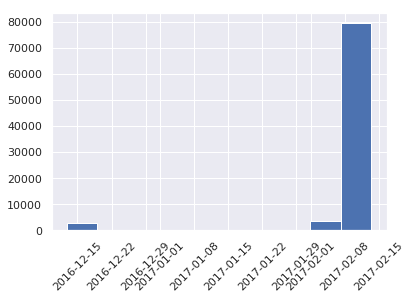

In [38]:
for i, (q, sub) in enumerate(df.groupby('species')):
    print(sub.head())
    plt.figure()
    sub.date.hist(xrot=45)
    break